机器学习的初步认识
- 监督学习supervised learning（数据+标签）
  - 回归regression analysis（预测值是连续值）
    - 例：根据房屋面积判断房价——房价是连续值
  - 分类classification（预测值是离散值）
    - 例：判断邮件是垃圾邮件——是/不是
- 无监督学习unsupervised learning（只有数据）
  - 聚类clustering algorithm
    - 例：饭店根据顾客的点菜种类和消费情况对顾客进行分组

回归分析
- 定义：利用数据统计原理，对大量统计数据进行数学处理，并确定 **因变量与某些自变量的相关关系** ，建立一个相关性较好的回归方程（函数表达式），并加以外推，用于预测今后的因变量的变化的分析方法。
- 分类：
  1. 根据自变量的个数来分类：
     - 一元回归分析；多元回归分析；
  2. 根据因变量和自变量的函数表达式来分类：
     - 线性回归分析；非线性回归分析（逻辑回归，多项式回归）；

**一元线性回归**
符号标记：
- $m$ 代表训练集中实例的数量
- $x$ 代表特征/输入变量
- $y$ 代表目标变量/输出变量
- $(x, y)$ 代表训练集中的实例
- $(x^{(i)}, y^{(i)})$ 代表第i个观察实例
- $h$ 代表学习算法的解决方案或函数也称为假设

...

使用最小二乘法求解 $min(I)$ ：
最小二乘拟合多项式： $I = \sum_{i=0}^m [f_k (x_i) - y_i]^2 = \sum_{i=0}^m (\sum_{k=0}^n a_k x_i^k - y_i)^2$
I为 $a_0, a_1, ..., a_n$ 的多元函数，因此上述问题即为求 $I=I(a_0, a_1, ..., a_n)$ 的极值问题。

两种求导的方法：
1. 代数法：多元函数求极值的方法。
2. 矩阵法：解矛盾方程组（向量矩阵求导）的方法。

**梯度下降法** 的简介：梯度下降是一个用来求函数 **最小值** 的算法，我们将使用梯度下降算法来求出代价函数 $J(\theta_0, \theta_1)$ 的最小值。

基本思想：函数的 **负梯度方向** 是函数值在该点下降最快的方向。

梯度下降法的步骤：
1. 赋初值。随机选择一个参数的组合 $(\theta_0, \theta_1, ..., \theta_n)$ ，计算代价函数
2. 计算梯度。计算当前位置的代价函数的梯度（即，各自变量的偏导数）
3. 更新参数。按照一定的步长进行参数更新，确定下一个能让代价函数值下降最多的

在迭代周期不变的情况下：
- 学习率较小时，收敛到正确结果的速度较慢。
- 学习率较大时，容易在搜索过程中发生震荡。

---

1、在摩擦实验中，当电压为-285V时电机开启，之后的时间与速度关系如下：
时间（ms）,速度（m/s）
10,0
30,0.066
50,0.088
70,0.1539
90,0.1979
110,0.2419
130,0.2639
150,0.3079
170,0.3299
190,0.3738
210,0.3958
230,0.4398
250,0.4398
270,0.4618
290,0.4838
310,0.5498
330,0.5498
350,0.5718
370,0.5938
390,0.6158
410,0.6158
430,0.6377
450,0.6377
470,0.6597
490,0.6597

（1）编程实现拟合模型，对下列各函数模型进行曲线拟合，画出拟合图，求出函数表达式以及误差平方和，线性拟合，多项式二次拟合，多项式三次拟合，对数函数拟合，幂函数拟合。（最小二乘法）

In [4]:
import numpy as np
import matplotlib.pyplot as plt

time = np.array([10, 30, 50, 70, 90, 110, 130, 150, 170, 190, 210, 230,
                250, 270, 290, 310, 330, 350, 370, 390, 410, 430, 450, 470, 490])
speed = np.array([0, 0.066, 0.088, 0.1539, 0.1979, 0.2419, 0.2639, 0.3079, 0.3299, 0.3738, 0.3958, 0.4398,
                 0.4398, 0.4618, 0.4838, 0.5498, 0.5498, 0.5718, 0.5938, 0.6158, 0.6158, 0.6377, 0.6377, 0.6597, 0.6597])


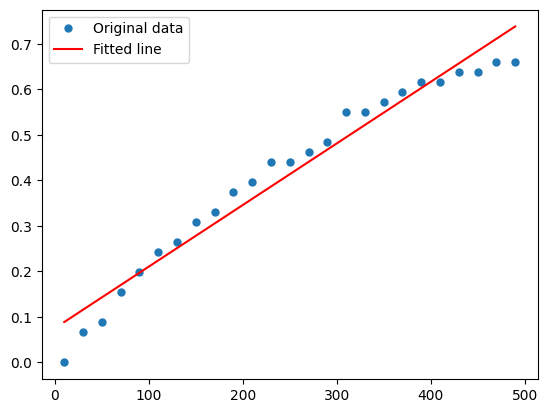

In [5]:
A = np.vstack([time, np.ones(len(time))]).T
m, c = np.linalg.lstsq(A, speed, rcond=None)[0]

plt.plot(time, speed, 'o', label='Original data', markersize=5)
plt.plot(time, m*time + c, 'r', label='Fitted line')
plt.legend()
plt.show()


In [6]:
fit_func = f"y = {m:.4f}x + {c:.4f}"
print("函数表达式:", fit_func)

error = np.linalg.lstsq(A, speed, rcond=None)[1][0]
print("误差平方和:", error)

函数表达式: y = 0.0014x + 0.0753
误差平方和: 0.039290752176922975


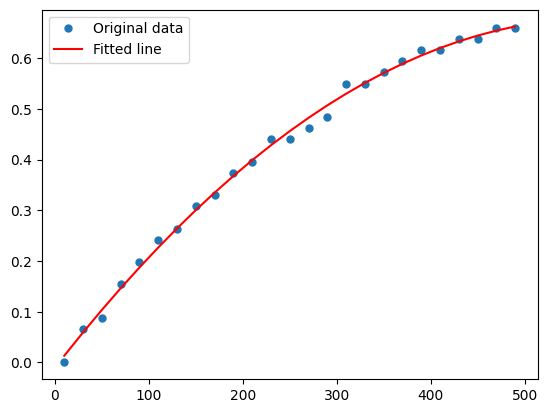

In [7]:
p = np.polyfit(time, speed, 2)

plt.plot(time, speed, 'o', label='Original data', markersize=5)
plt.plot(time, np.polyval(p, time), 'r', label='Fitted line')
plt.legend()
plt.show()

In [8]:
fit_func = f"y = {p[0]:.4f}x^2 + {p[1]:.4f}x + {p[2]:.4f}"
print("函数表达式:", fit_func)

error = np.sum((np.polyval(p, time) - speed) ** 2)
print("误差平方和:", error)

函数表达式: y = -0.0000x^2 + 0.0024x + -0.0103
误差平方和: 0.003017346513415091


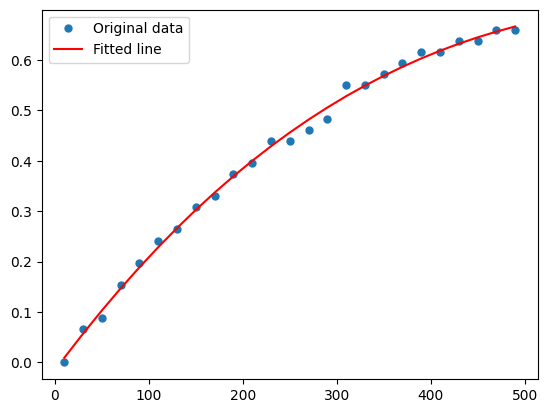

In [21]:
p = np.polyfit(time, speed, 3)

plt.plot(time, speed, 'o', label='Original data', markersize=5)
plt.plot(time, np.polyval(p, time), 'r', label='Fitted line')
plt.legend()
plt.show()

In [22]:
fit_func = f"y = {p[0]:.4f}x^3 + {p[1]:.4f}x^2 + {p[2]:.4f}x + {p[3]:.4f}"
print("函数表达式:", fit_func)

error = np.sum((np.polyval(p, time) - speed) ** 2)
print("误差平方和:", error)

函数表达式: y = 0.0000x^3 + -0.0000x^2 + 0.0025x + -0.0155
误差平方和: 0.0029210730215668322


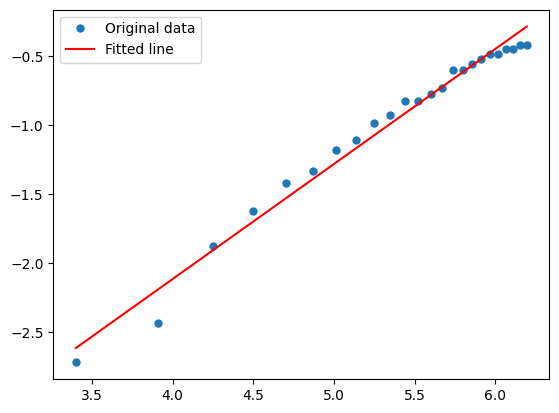

In [16]:
# 过滤掉速度为0的数据点
non_zero_mask = speed != 0
time_non_zero = time[non_zero_mask]
speed_non_zero = speed[non_zero_mask]

# 取对数
log_time = np.log(time_non_zero)
log_speed = np.log(speed_non_zero)

# 线性拟合
p = np.polyfit(log_time, log_speed, 1)

# 绘制拟合图
plt.plot(log_time, log_speed, 'o', label='Original data', markersize=5)
plt.plot(log_time, np.polyval(p, log_time), 'r', label='Fitted line')
plt.legend()
plt.show()


In [17]:
# 计算误差平方和和函数表达式
fit_func = f"y = {np.exp(p[1]):.4f}x^{p[0]:.4f}"
print("函数表达式:", fit_func)

error = np.sum((np.exp(np.polyval(p, log_time)) - speed_non_zero) ** 2)
print("误差平方和:", error)


函数表达式: y = 0.0043x^0.8339
误差平方和: 0.027266453311032852


（2）分析各种曲线的拟合结果与误差，选择最佳模型，画出速度与时间的拟合曲线及200ms时的加速度。

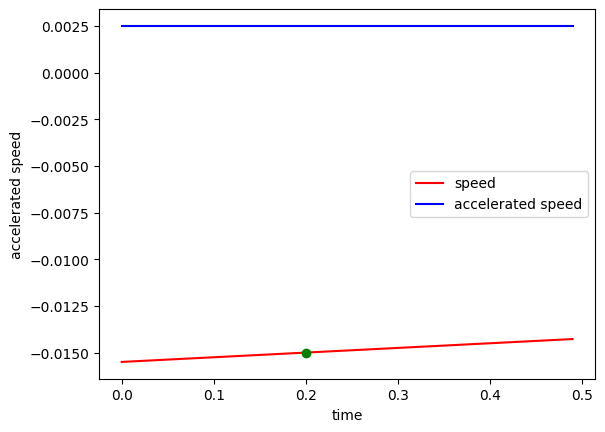

In [24]:
# 对比可以看出 函数表达式: y = 0.0000x^3 + -0.0000x^2 + 0.0025x + -0.0155
# 误差平方和: 0.0029210730215668322 是最佳的模型
# 定义三次多项式
poly = np.poly1d([0.0000, -0.0000, 0.0025, -0.0155])

# 定义时间范围
time = np.arange(0, 0.5, 0.01)

# 计算速度和加速度
speed = poly(time)
acceleration = np.gradient(speed, time)

# 绘制速度-时间曲线
plt.plot(time, speed, 'r-', label='speed')
plt.xlabel('time')
plt.ylabel('speed')

# 绘制加速度-时间曲线
plt.plot(time, acceleration, 'b-', label='accelerated speed')
plt.xlabel('time')
plt.ylabel('accelerated speed')

# 标记200ms时的速度和加速度
plt.plot([0.2], [poly(0.2)], 'go')
plt.plot([0.2], [np.gradient(poly(0.2), 0.01)], 'yo')

# 添加图例
plt.legend()

# 显示图形
plt.show()


2、使用例题1中的数据生成方法，生成一组数据，并实现其多项式回归。假设多项式为： $h(x)=a_1 + a_2 * x + a_3 * x^2$
要求画出散点图和拟合后的曲线。（梯度下降法）

In [25]:
# 生成数据
np.random.seed(0)
n = 100
x = np.linspace(-1, 1, n)
y = 2 + 3 * x + 4 * x**2 + np.random.randn(n)*0.5

In [26]:
# 定义代价函数和梯度下降算法
def compute_cost(X, y, theta):
    m = len(y)
    J = 1/(2*m)*np.sum((X.dot(theta)-y)**2)
    return J

def gradient_descent(X, y, theta, alpha, num_iters):
    m = len(y)
    J_history = np.zeros(num_iters)
    for i in range(num_iters):
        theta = theta - alpha/m*X.T.dot(X.dot(theta)-y)
        J_history[i] = compute_cost(X, y, theta)
    return theta, J_history


In [27]:
# 预处理数据
X = np.vstack((np.ones(n), x, x**2)).T

# 初始化参数
theta = np.zeros(3)

# 梯度下降
alpha = 0.1
num_iters = 1000
theta, J_history = gradient_descent(X, y, theta, alpha, num_iters)

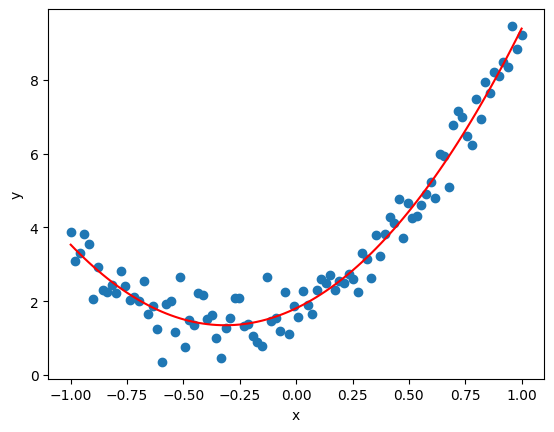

In [28]:
# 绘制散点图
plt.scatter(x, y)

# 绘制拟合曲线
xx = np.linspace(-1, 1, 100)
yy = theta[0] + theta[1]*xx + theta[2]*xx**2
plt.plot(xx, yy, 'r')

plt.xlabel('x')
plt.ylabel('y')
plt.show()

3、使用鸢尾花数据中前两类别的样本，任取其中两维特征构建逻辑回归分类器，并对原始数据和分类边界进行可视化。（梯度下降法）

In [39]:
from sklearn.datasets import load_iris
import numpy as np
import matplotlib.pyplot as plt

In [45]:
# 加载数据集
iris = load_iris()

# 取出前两类别的样本并把标签变为-1和1
X = iris.data[:100, :2]
y = iris.target[:100]
y[y==0] = -1

In [46]:
# 定义代价函数和梯度下降算法
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def compute_cost(X, y, theta):
    m = len(y)
    h = sigmoid(X.dot(theta))
    J = -1 / m * (y.T.dot(np.log(h)) + (1 - y).T.dot(np.log(1 - h)))
    return J

def gradient_descent(X, y, theta, alpha, num_iters):
    m = len(y)
    J_history = np.zeros(num_iters)
    for i in range(num_iters):
        theta = theta - alpha / m * X.T.dot(sigmoid(X.dot(theta)) - y)
        J_history[i] = compute_cost(X, y, theta)
    return theta, J_history

In [47]:
# 初始化参数
m, n = X.shape
X = np.hstack((np.ones((m, 1)), X))
theta = np.zeros(n + 1)

# 梯度下降
alpha = 0.1
num_iters = 1000
theta, J_history = gradient_descent(X, y, theta, alpha, num_iters)

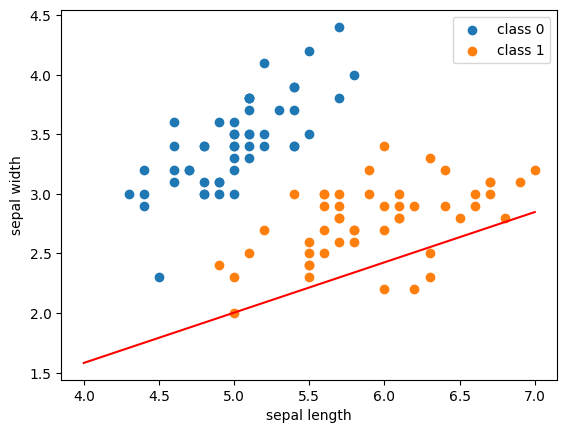

In [48]:
# 绘制原始数据
plt.scatter(X[y == -1, 1], X[y == -1, 2], label='class 0')
plt.scatter(X[y == 1, 1], X[y == 1, 2], label='class 1')

# 绘制分类边界
xx = np.linspace(4, 7, 100)
yy = -(theta[0] + theta[1] * xx) / theta[2]
plt.plot(xx, yy, 'r')

plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.legend()
plt.show()

In [50]:
from sklearn.datasets import load_iris
import numpy as np
import matplotlib.pyplot as plt

# 加载鸢尾花数据集
iris = load_iris()

# 筛选出前两类别的样本
X = iris.data[:100, :2]
y = iris.target[:100]


In [51]:
# 将数据集分为训练集和测试集，并使用逻辑回归分类器进行训练和预测。

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

# 将数据集分为训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)



In [52]:
# 使用逻辑回归分类器进行训练和预测
clf = LogisticRegression()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)


C:\Users\25810\AppData\Local\Temp\ipykernel_9548\1569391782.py:17: UserWarning: No contour levels were found within the data range.
  plt.contour(xx, yy, Z, colors='k', levels=[0], linestyles=['-'])


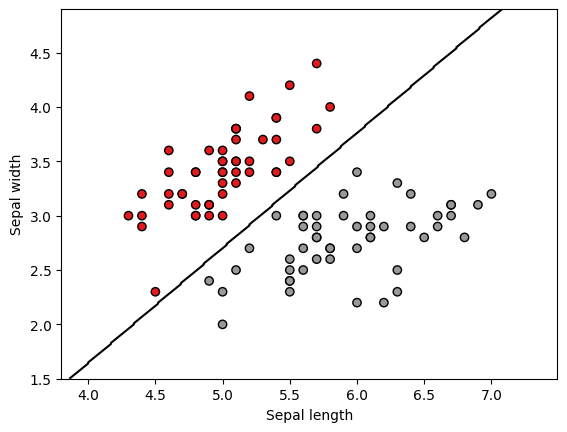

In [53]:
# 使用 matplotlib 库将原始数据和分类边界进行可视化。

# 生成网格点坐标
x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                     np.arange(y_min, y_max, 0.01))

# 绘制原始数据
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Set1, edgecolor='k')
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')

# 绘制分类边界
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contour(xx, yy, Z, colors='k', levels=[0], linestyles=['-'])

plt.show()
